In [106]:
from dotenv import load_dotenv
import os
import pandas as pd
import numpy as np
from fredapi import Fred
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import fredpy as fp

In [107]:
# .env에서 api_key 가져오기 
load_dotenv()

FRED_API_KEY = os.getenv('FRED_API_KEY')


In [3]:
# # fredapi 
# fred = Fred(api_key = FRED_API_KEY)

# # 실업률
# unemployment = fred.get_series_all_releases('UNRATE')

# # PPI
# ppi = fred.get_series_all_releases('PPIACO')
# ppi.tail()

,realtime_start,date,value
1710,2024-08-13 00:00:00,2024-06-01 00:00:00,255.779
1711,2024-09-12 00:00:00,2024-06-01 00:00:00,256.015
1712,2024-08-13 00:00:00,2024-07-01 00:00:00,257.723
1713,2024-09-12 00:00:00,2024-07-01 00:00:00,257.485
1714,2024-09-12 00:00:00,2024-08-01 00:00:00,255.613


In [108]:
# fredpy
plt.style.use('classic')
plt.rcParams.update({'figure.facecolor': 'white'})

fp.api_key = FRED_API_KEY

enddate=(datetime.now() + timedelta(days=-1)).strftime('%Y-%m-%d')


## 예시 
CPI 데이터 가져와서 시각화

In [5]:
# sample : CPI

cpi= fp.series('CPIAUCSL',enddate)
corecpi = fp.series('CPILFESL',enddate)
cpi.data
cpiyoy=cpi.apc().data
cpiyoy
cpimom=cpi.data.pct_change()*100
cpimom
corecpiyoy=corecpi.apc().data
corecpimom=corecpi.data.pct_change()*100

import plotly.express as px

fig=px.bar(x=cpiyoy.index, y=cpiyoy.values, color=cpiyoy.values, 
          title='CPI YOY 장기데이터', height=500)
fig.update_traces(textposition='outside')
fig.update_layout(
    uniformtext_minsize=8, uniformtext_mode='hide',
    title={
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [6]:
dfyoy = pd.DataFrame({'CPI':cpiyoy.values, 'coreCPI':corecpiyoy},index=cpiyoy.index)
dfyoy

,CPI,coreCPI
date,,
1948-01-01,10.242086,NaN
1948-02-01,9.481961,NaN
1948-03-01,6.818182,NaN
1948-04-01,8.272727,NaN
1948-05-01,9.384966,NaN
...,...,...
2024-04-01,3.357731,3.615527
2024-05-01,3.250210,3.411063
2024-06-01,2.975629,3.276939


In [7]:
import plotly.express as px

fig=px.line(data_frame=dfyoy, x=dfyoy.index, y=['CPI','coreCPI'], 
          title='CPI vs CoreCPI YOY 장기데이터', height=500)
fig.update_layout(
    uniformtext_minsize=8, uniformtext_mode='hide',
    title={
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [8]:
# 경기 침체

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

usreg = fp.series('USREC',enddate)
usregdata=usreg.data.loc[usreg.data.index>='1945-01-01']

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Line(x=dfyoy.index, y=dfyoy['CPI'], name="CPI"),
    secondary_y=True,
)

fig.add_trace(
    go.Line(x=dfyoy.index, y=dfyoy['coreCPI'], name="Core CPI"),
    secondary_y=True,
)

fig.add_trace(
    go.Bar(x=usregdata.index, y=usregdata.values, name="경기침체"),
    secondary_y=False,
)

fig.show()

c:\Users\Skku\anaconda3\envs\economy\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




## 시작
### 데이터 수집 목록
- 물가 : CPI, PCE, PPI
- 고용 : 실업률, 비농업 고용지수, 평균 시간당 임금, 실업수당 청구 건수, JOLTs Job Openings, 노동수요대비 공급률
- 경기 : GDP 성장률, PMI, Retail Sales, 산업 생산 지수, OECD 경기선행지수, 소비자 심리 지수, Citi Economic Surprise Index
* Fred에 없는 지표 : 노동수요대비공급률, PMI, citi economic surprise index

In [109]:
# PPIfd : PPI final demand
# AHE : Average Hourly Earnings
# GDP : real GDP growth rate 

code_dic = {'CPI': 'CPIAUCSL', 'coreCPI':'CPILFESL', 'PCE':'PCE', 'corePCE':'PCEPI', 'PPI':'PPIACO', 'PPIfd':'PPIFIS', 'corePPIfd':'PPIFES', 
            'unemployment':'UNRATE', 'Nonfarm':'PAYEMS', 'AHE':'CES0500000003',  'job openings':'JTSJOL',
            'GDP':'A191RL1Q225SBEA', 'retail':'MARTSMPCSM44X72USS', 'industrial production':'INDPRO', 'OECD leading':'USALOLITONOSTSAM','consumer sentiment':'UMCSENT'}

claims_dic = {'initial claims': 'ICSA', 'continued claims':'CCSA'}

IR_code = 'FEDFUNDS'

code_dic.values()

dict_values(['CPIAUCSL', 'CPILFESL', 'PCE', 'PCEPI', 'PPIACO', 'PPIFIS', 'PPIFES', 'UNRATE', 'PAYEMS', 'CES0500000003', 'JTSJOL', 'A191RL1Q225SBEA', 'MARTSMPCSM44X72USS', 'INDPRO', 'USALOLITONOSTSAM', 'UMCSENT'])

In [110]:
# fredpy로 max 기간만큼 가져오기
# yoy, mom 계산 후 추가
# df로 변환

df_dic = {}

# df_dic['CPI'].apc().data, df_dic['CPI'].data.pct_change()*100

for key in code_dic.keys() : 
     s = fp.series(code_dic[key],enddate)
     yoy = s.apc().data
     mom = s.data.pct_change()*100
     df_dic[key] = pd.DataFrame({'date': s.data.index, f'{key}' : s.data.values})
     df_dic[f'{key}_yoy'] = pd.DataFrame({'date': yoy.index, f'{key}_yoy' : yoy.values})
     df_dic[f'{key}_mom'] = pd.DataFrame({'date': mom.index, f'{key}_mom' : mom.values})

C:\Users\Skku\AppData\Local\Temp\ipykernel_3508\2010959007.py:12: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  mom = s.data.pct_change()*100


In [111]:
# claims 는 한달에 3~4번 발표
# 월 별로 묶어서 평균냄, yoy/mom 없음

for key in claims_dic.keys() :
    s = fp.series(claims_dic[key],enddate)
    temp = pd.DataFrame({'date':s.data.index, f'{key}':s.data.values})
    temp['date'] = pd.to_datetime(temp['date']).dt.strftime('%Y-%m-01')
    temp = temp.groupby(['date']).mean()
    temp = pd.DataFrame({'date':temp[key].index,f'{key}':temp[key].values})
    df_dic[key]= temp

df_dic['initial claims'], df_dic['continued claims']

(           date  initial claims
 0    1967-01-01        209000.0
 1    1967-02-01        229000.0
 2    1967-03-01        260750.0
 3    1967-04-01        263000.0
 4    1967-05-01        235750.0
 ..          ...             ...
 688  2024-05-01        223000.0
 689  2024-06-01        236800.0
 690  2024-07-01        238250.0
 691  2024-08-01        231000.0
 692  2024-09-01        224250.0
 
 [693 rows x 2 columns],
            date  continued claims
 0    1967-01-01      1.118750e+06
 1    1967-02-01      1.162500e+06
 2    1967-03-01      1.243250e+06
 3    1967-04-01      1.281000e+06
 4    1967-05-01      1.277500e+06
 ..          ...               ...
 688  2024-05-01      1.788500e+06
 689  2024-06-01      1.833800e+06
 690  2024-07-01      1.861000e+06
 691  2024-08-01      1.852400e+06
 692  2024-09-01      1.824667e+06
 
 [693 rows x 2 columns])

In [112]:
# 모든 df 병합
from functools import reduce

# date type 맞춰주기
for df in df_dic.values():
    df['date'] = pd.to_datetime(df['date'])

merged_df = reduce(lambda df1, df2 : pd.merge(df1,df2,on='date',how='outer'),df_dic.values())
merged_df


,date,CPI,CPI_yoy,CPI_mom,coreCPI,coreCPI_yoy,coreCPI_mom,PCE,PCE_yoy,PCE_mom,...,industrial production_yoy,industrial production_mom,OECD leading,OECD leading_yoy,OECD leading_mom,consumer sentiment,consumer sentiment_yoy,consumer sentiment_mom,initial claims,continued claims
0,1913-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1913-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1913-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1913-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1913-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,2024-05-01,313.225,3.250210,0.005747,318.140,3.411063,0.163087,19697.3,5.466257,0.479511,...,0.227906,0.749357,NaN,NaN,NaN,69.1,17.118644,-10.492228,223000.0,1.788500e+06
1337,2024-06-01,313.049,2.975629,-0.056190,318.346,3.276939,0.064751,19747.5,5.364394,0.254857,...,0.877996,0.062200,NaN,NaN,NaN,68.2,6.230530,-1.302460,236800.0,1.833800e+06
1338,2024-07-01,313.534,2.923566,0.154928,318.872,3.213193,0.165229,19849.9,5.301716,0.518547,...,-0.743556,-0.943069,NaN,NaN,NaN,66.4,-7.132867,-2.639296,238250.0,1.861000e+06
1339,2024-08-01,314.121,2.591227,0.187221,319.768,3.265559,0.280990,19897.1,5.211087,0.237785,...,0.042485,0.814323,NaN,NaN,NaN,67.9,-2.161383,2.259036,231000.0,1.852400e+06


In [113]:
# 금리 기준으로 Join
# df['col'].diff() 로 금리 변동 계산
s = fp.series(IR_code,enddate)
df_ir = pd.DataFrame({'date':s.data.index,'interest rate':s.data.values})
df_ir.head()

merged_df = merged_df.merge(df_ir,how='outer', on='date')
merged_df['interest rate fluctuation'] = merged_df['interest rate'].diff()
shifted_df = merged_df.copy()
shifted_df['interest rate fluctuation'] = merged_df['interest rate fluctuation'].shift(-1)

try :
    os.makedirs('dataframes')
    merged_df.to_csv('dataframes/merged_df.csv',index=False)
    shifted_df.to_csv('dataframes/shifted_df.csv',index=False)
except : 
    merged_df.to_csv('dataframes/merged_df.csv',index=False)
    shifted_df.to_csv('dataframes/shifted_df.csv',index=False)


## EDA + Feature Engineering 
1. ~~Feature 유형 파악(범주형/ 연속형/ 문자열)~~ - skip (모든 feature가 연속형 데이터이다.) 
2. 결측치 처리
3. 이상치 처리 
4. 스케일링
5. Correlation Analysis
5. Feature Selection 

### 결측치 처리 (Data Imputation)
- 결측치 수를 사분범위로 나눈다.
- 사분범위에 따라 열 제거를 하고, 그 후 행 제거를 한다.
- 각 사분범위에 따라 결측치 처리된 데이터프레임을 csv로 저장한다.
- 최종적으로 각각 다른 방식으로 결측치 처리된 4개의 데이터셋이 나온다.

In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [114]:
merged_df = pd.read_csv('dataframes/merged_df.csv')
shifted_df = pd.read_csv('dataframes/shifted_df.csv')

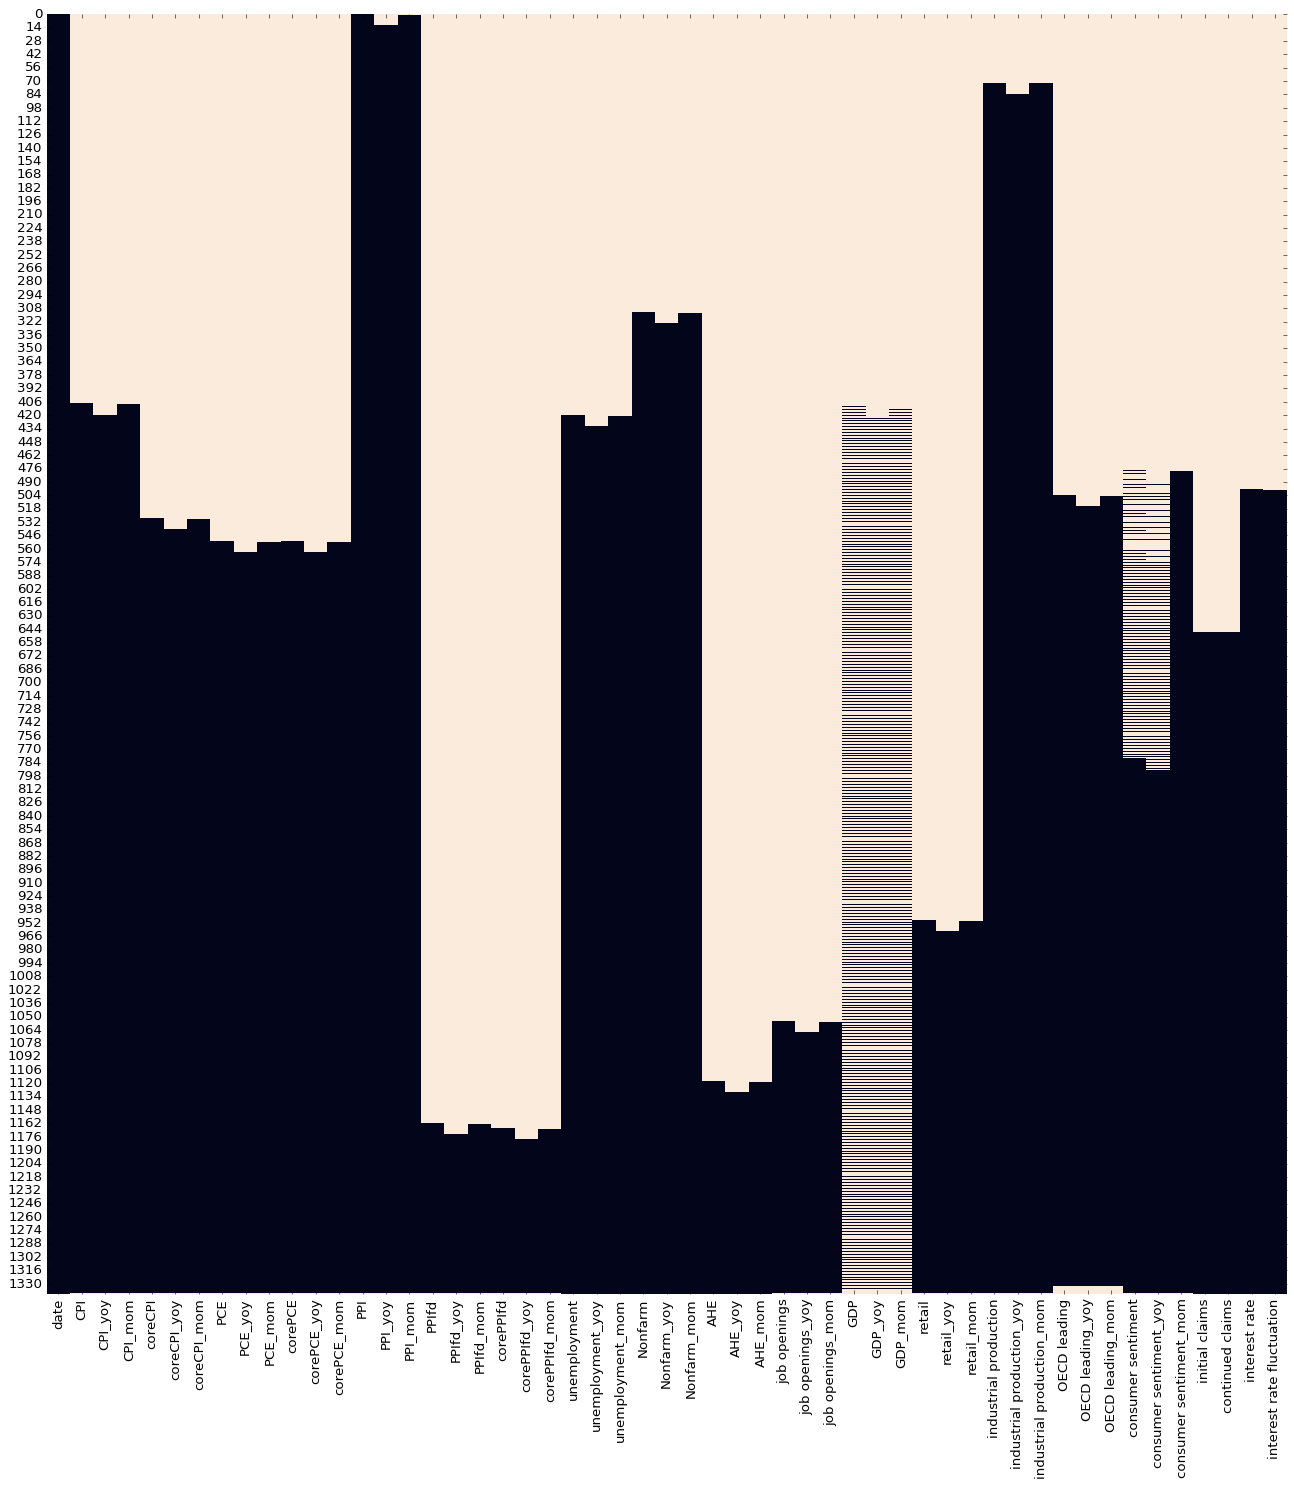

In [115]:
# msno.matrix(merged_df)
# plt.show()

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(merged_df.isna(),cbar=False, ax=ax)
 
try :
    os.makedirs('images')
    plt.savefig('images/missing_values.png')
except : 
    plt.savefig('images/missing_values.png')

In [116]:
# 결측률 
# merged_df['initial claims'].isna().sum()/ merged_df['date'].count()

# nullRate_dic = {}

# for key in merged_df.keys():
#     null_rate = merged_df[key].isna().sum()/merged_df['date'].count()
#     if null_rate > 0 :
#         nullRate_dic[key]=null_rate

IQR_dic = {}

# nullRate_tuple = sorted(nullRate_dic.items(),key=lambda x:x[1],reverse=True)
# nullRate_df = pd.DataFrame(list(nullRate_tuple), columns=['name','value'])
# nullRate_df['value'].describe()

IQR_dic['q1'] = merged_df.count().describe()['25%']
IQR_dic['q2'] = merged_df.count().describe()['50%']
IQR_dic['q3'] = merged_df.count().describe()['75%']
IQR_dic['q4'] = merged_df.count().describe()['max']
IQR_dic

{'q1': 308.0, 'q2': 788.0, 'q3': 920.0, 'q4': 1341.0}

In [117]:
# IQR(사분범위)로 열 제거 => 나머지 결측치 행 제거
merged_df.count()['CPI']
imputed_df_dic = {}


for z in IQR_dic.items() :
    imputed_df = merged_df.copy()
    for key in imputed_df.keys():
        if key == 'interest rate' or key == 'interest rate fluctuation':
            continue
        if imputed_df.count()[key] < z[1]:
            imputed_df.drop(key, axis=1, inplace=True)
    imputed_df.dropna(axis=0, inplace=True)
    imputed_df_dic[z[0]] = imputed_df


for z in imputed_df_dic.items():
    z[1].to_csv(f'dataframes/imputed_df_{z[0]}.csv', index=False)


### 이상치 처리 ( Outlier Handling) 
- Isolation Forest


In [118]:
sns.set_style('darkgrid')
from sklearn.ensemble import IsolationForest

In [119]:
# 이상치가 데이터셋 규모에 비해 너무 많음 => 이상치 제거 안하고 스케일링을 한다.
# 스케일링을 통해 이상치를 완화할 것
test_df = pd.read_csv('dataframes/imputed_df_q2.csv')
test_df.drop('date',axis=1,inplace=True)
X = test_df.values
clf = IsolationForest(random_state=0, bootstrap=True).fit(X)
pd.Series(clf.predict(X)).value_counts()

 1    660
-1    121
Name: count, dtype: int64

### Scailing
주요 스케일링 기법 

1. Standardization - StandardScaler 
    - 평균 0, 분산 1로 만드는 스케일링
2. normalization - MinMaxScaler
    - 0~1 값을 가지도록 스케일링
    - 분류보다 회귀 문제에 더 적합한 스케일링 기법
    - 이상치에 영향을 크게 받음
3. Robust Scale - RobustScaler
    - median = 0, IQR = 1 이 되도록 스케일링
    - StandardScaler에 비해 이상치의 영향이 적어짐
4. Log scale
    - 로그 함수에 특성 때문에 데이터 간 값의 편차를 줄여준다. 이로 인해 정규성이 높아진다. 또한 계산을 단순화 시켜준다. 
    - 로그로 변환 후 값을 복원하는 작업이 필요한데, 로그의 역함수인 지수함수를 이용하면 된다.
    - Skew가 심한 데이터에 주로 사용한다.
    - 0과 음수인 데이터는 로그를 취할 수 없다. 
    - log() 대신 log1p()를 사용

주의점 
- 테스트 데이터셋에 fit 메서드를 적용하면 안된다. 학습 데이터와 테스트 데이터의 스케일링 기준 정보가 달리져 올바른 예측 결과를 도출하지 못한다.
- 일반적으로 target(y)은 스케일링 하지 않는다.
- 선형 기반 ML의 입력에서 MinMax, Standard scaler를 선호한다.

array([[<Axes: title={'center': 'CPI'}>,
        <Axes: title={'center': 'CPI_yoy'}>,
        <Axes: title={'center': 'CPI_mom'}>,
        <Axes: title={'center': 'coreCPI'}>,
        <Axes: title={'center': 'coreCPI_yoy'}>],
       [<Axes: title={'center': 'coreCPI_mom'}>,
        <Axes: title={'center': 'PCE'}>,
        <Axes: title={'center': 'corePCE'}>,
        <Axes: title={'center': 'PPI'}>,
        <Axes: title={'center': 'PPI_yoy'}>],
       [<Axes: title={'center': 'PPI_mom'}>,
        <Axes: title={'center': 'unemployment'}>,
        <Axes: title={'center': 'unemployment_yoy'}>,
        <Axes: title={'center': 'unemployment_mom'}>,
        <Axes: title={'center': 'Nonfarm'}>],
       [<Axes: title={'center': 'Nonfarm_yoy'}>,
        <Axes: title={'center': 'Nonfarm_mom'}>,
        <Axes: title={'center': 'industrial production'}>,
        <Axes: title={'center': 'industrial production_yoy'}>,
        <Axes: title={'center': 'industrial production_mom'}>],
       [<Axes: titl

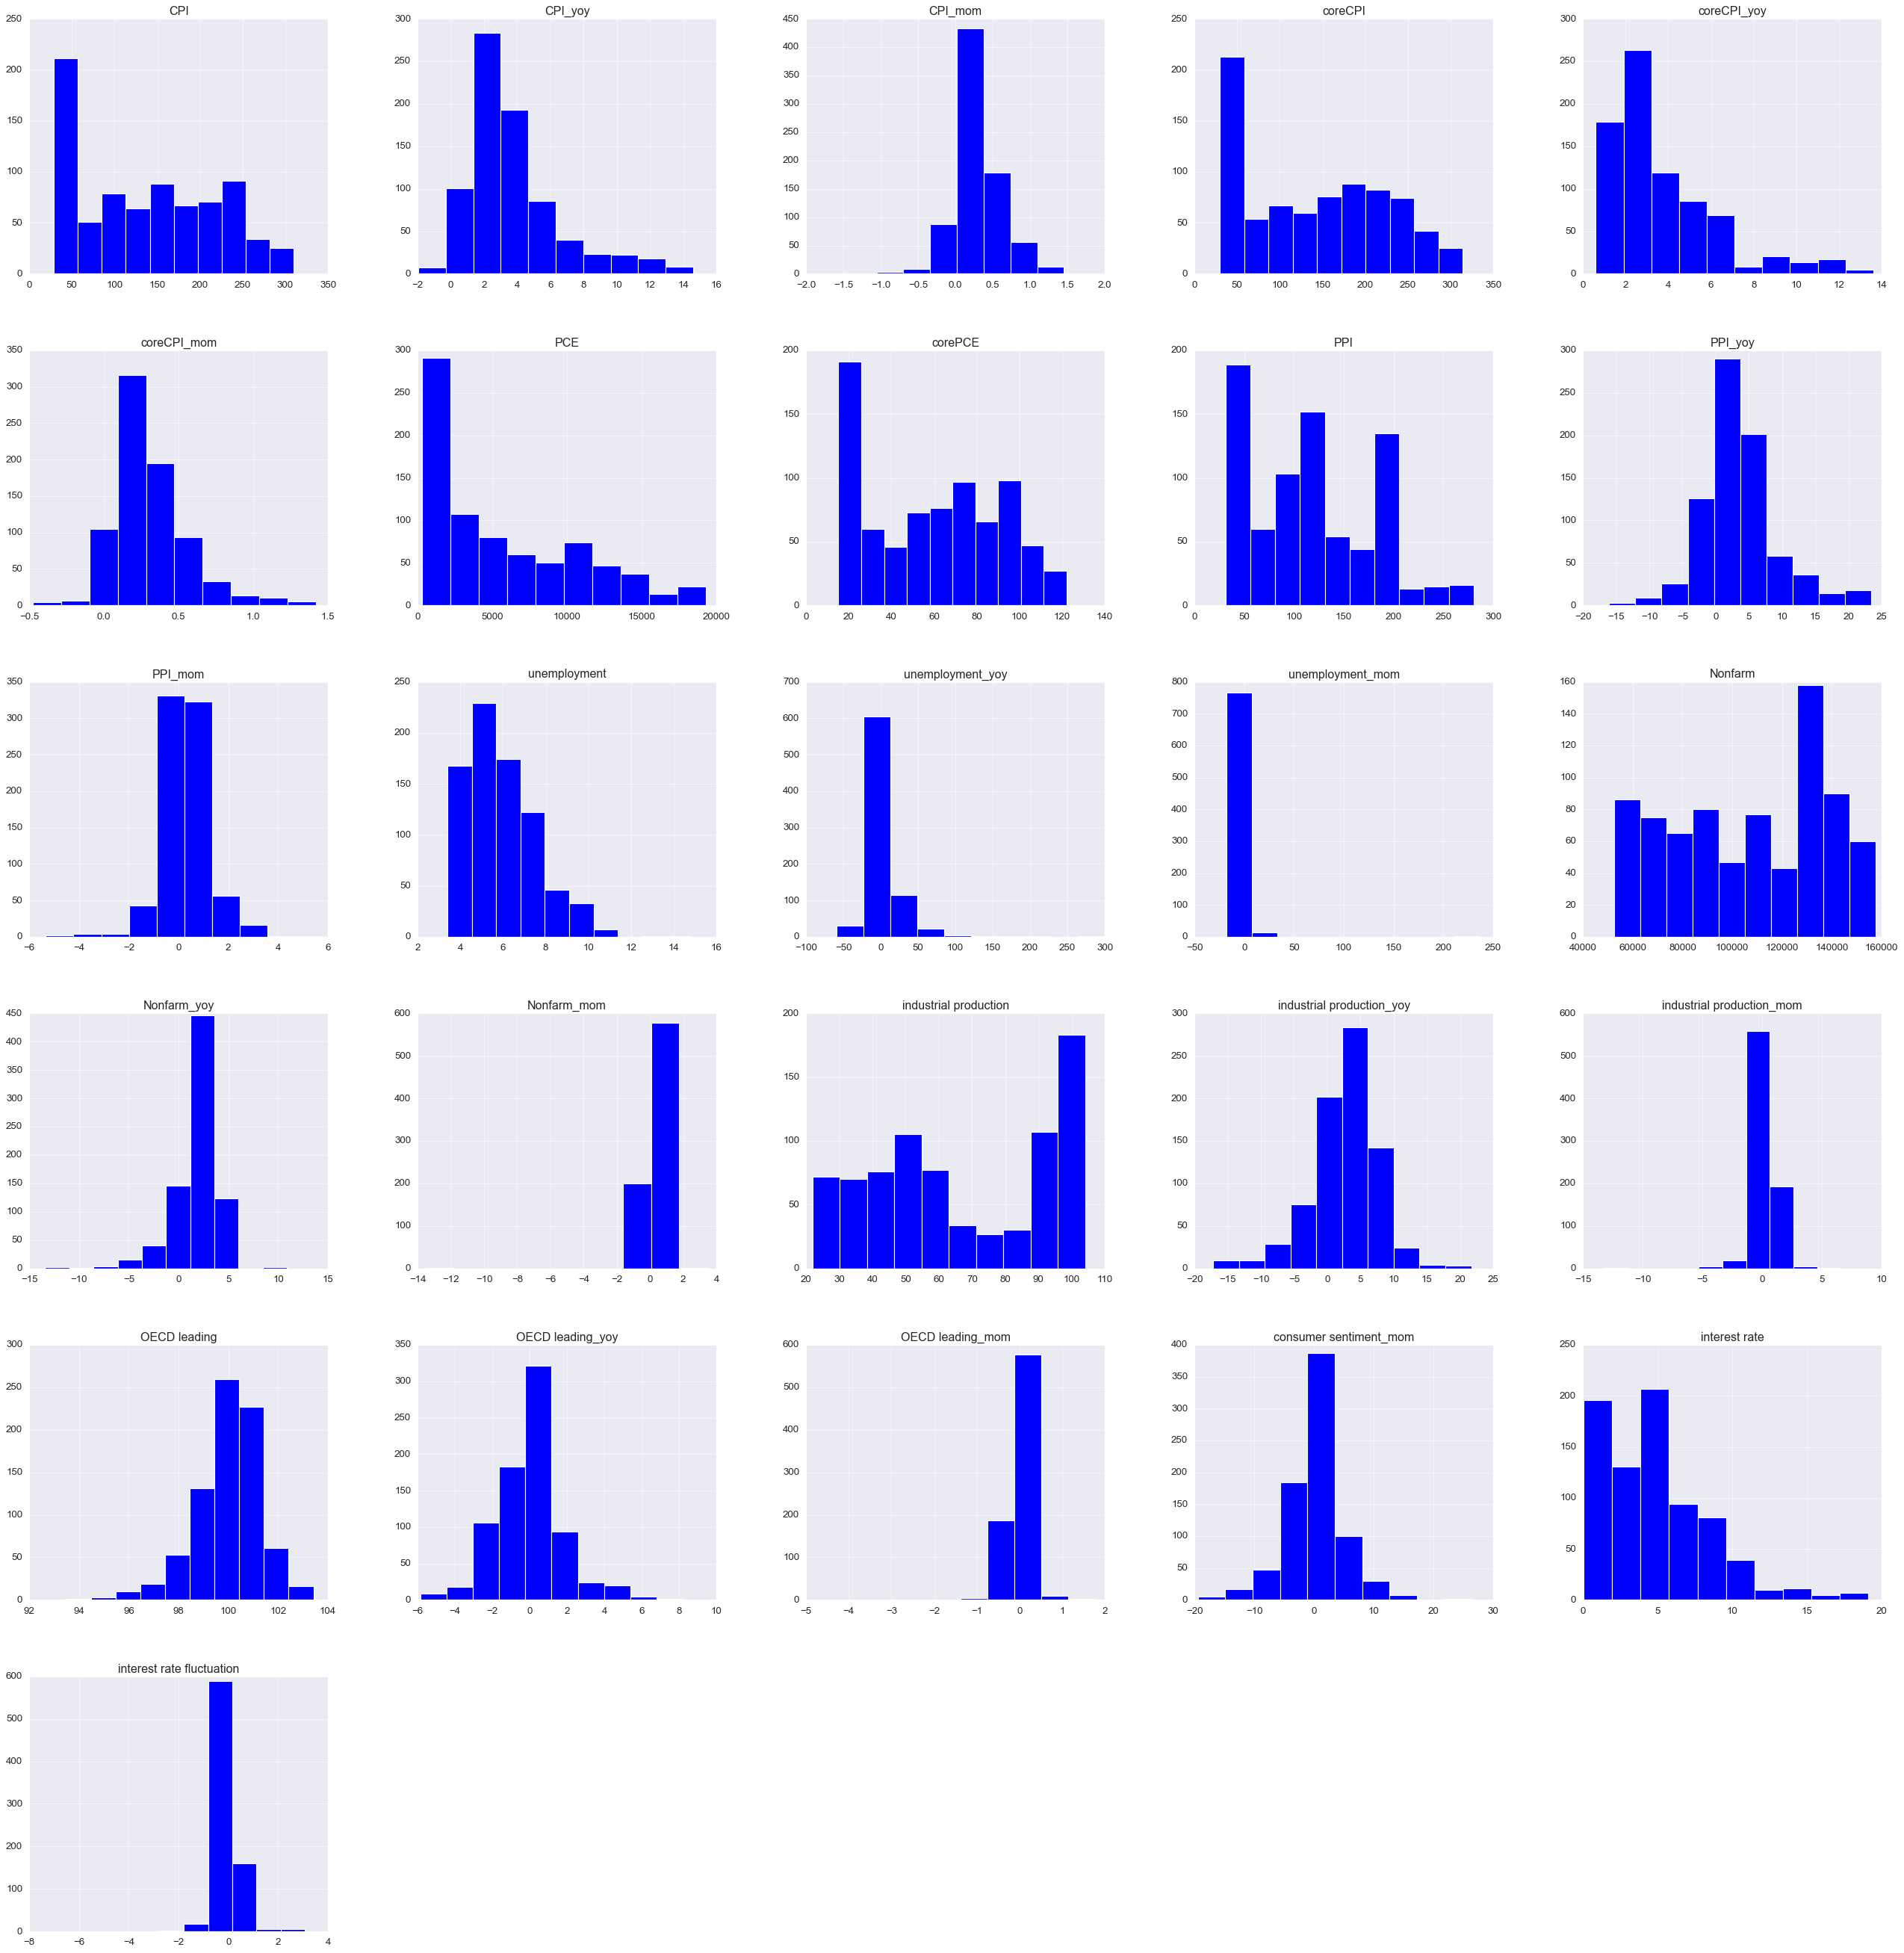

In [120]:
# 데이터가 적어 이상치 제거를 못했으니 전체 데이터셋에 이상치의 영향을 줄이는 로그 변환을 적용하겠다.
test_df = pd.read_csv('dataframes/imputed_df_q2.csv')
test_df.drop('date',axis=1,inplace=True)
test_df.hist(figsize=(40,40))

array([[<Axes: title={'center': 'CPI'}>,
        <Axes: title={'center': 'CPI_yoy'}>,
        <Axes: title={'center': 'CPI_mom'}>,
        <Axes: title={'center': 'coreCPI'}>,
        <Axes: title={'center': 'coreCPI_yoy'}>],
       [<Axes: title={'center': 'coreCPI_mom'}>,
        <Axes: title={'center': 'PCE'}>,
        <Axes: title={'center': 'corePCE'}>,
        <Axes: title={'center': 'PPI'}>,
        <Axes: title={'center': 'PPI_yoy'}>],
       [<Axes: title={'center': 'PPI_mom'}>,
        <Axes: title={'center': 'unemployment'}>,
        <Axes: title={'center': 'unemployment_yoy'}>,
        <Axes: title={'center': 'unemployment_mom'}>,
        <Axes: title={'center': 'Nonfarm'}>],
       [<Axes: title={'center': 'Nonfarm_yoy'}>,
        <Axes: title={'center': 'Nonfarm_mom'}>,
        <Axes: title={'center': 'industrial production'}>,
        <Axes: title={'center': 'industrial production_yoy'}>,
        <Axes: title={'center': 'industrial production_mom'}>],
       [<Axes: titl

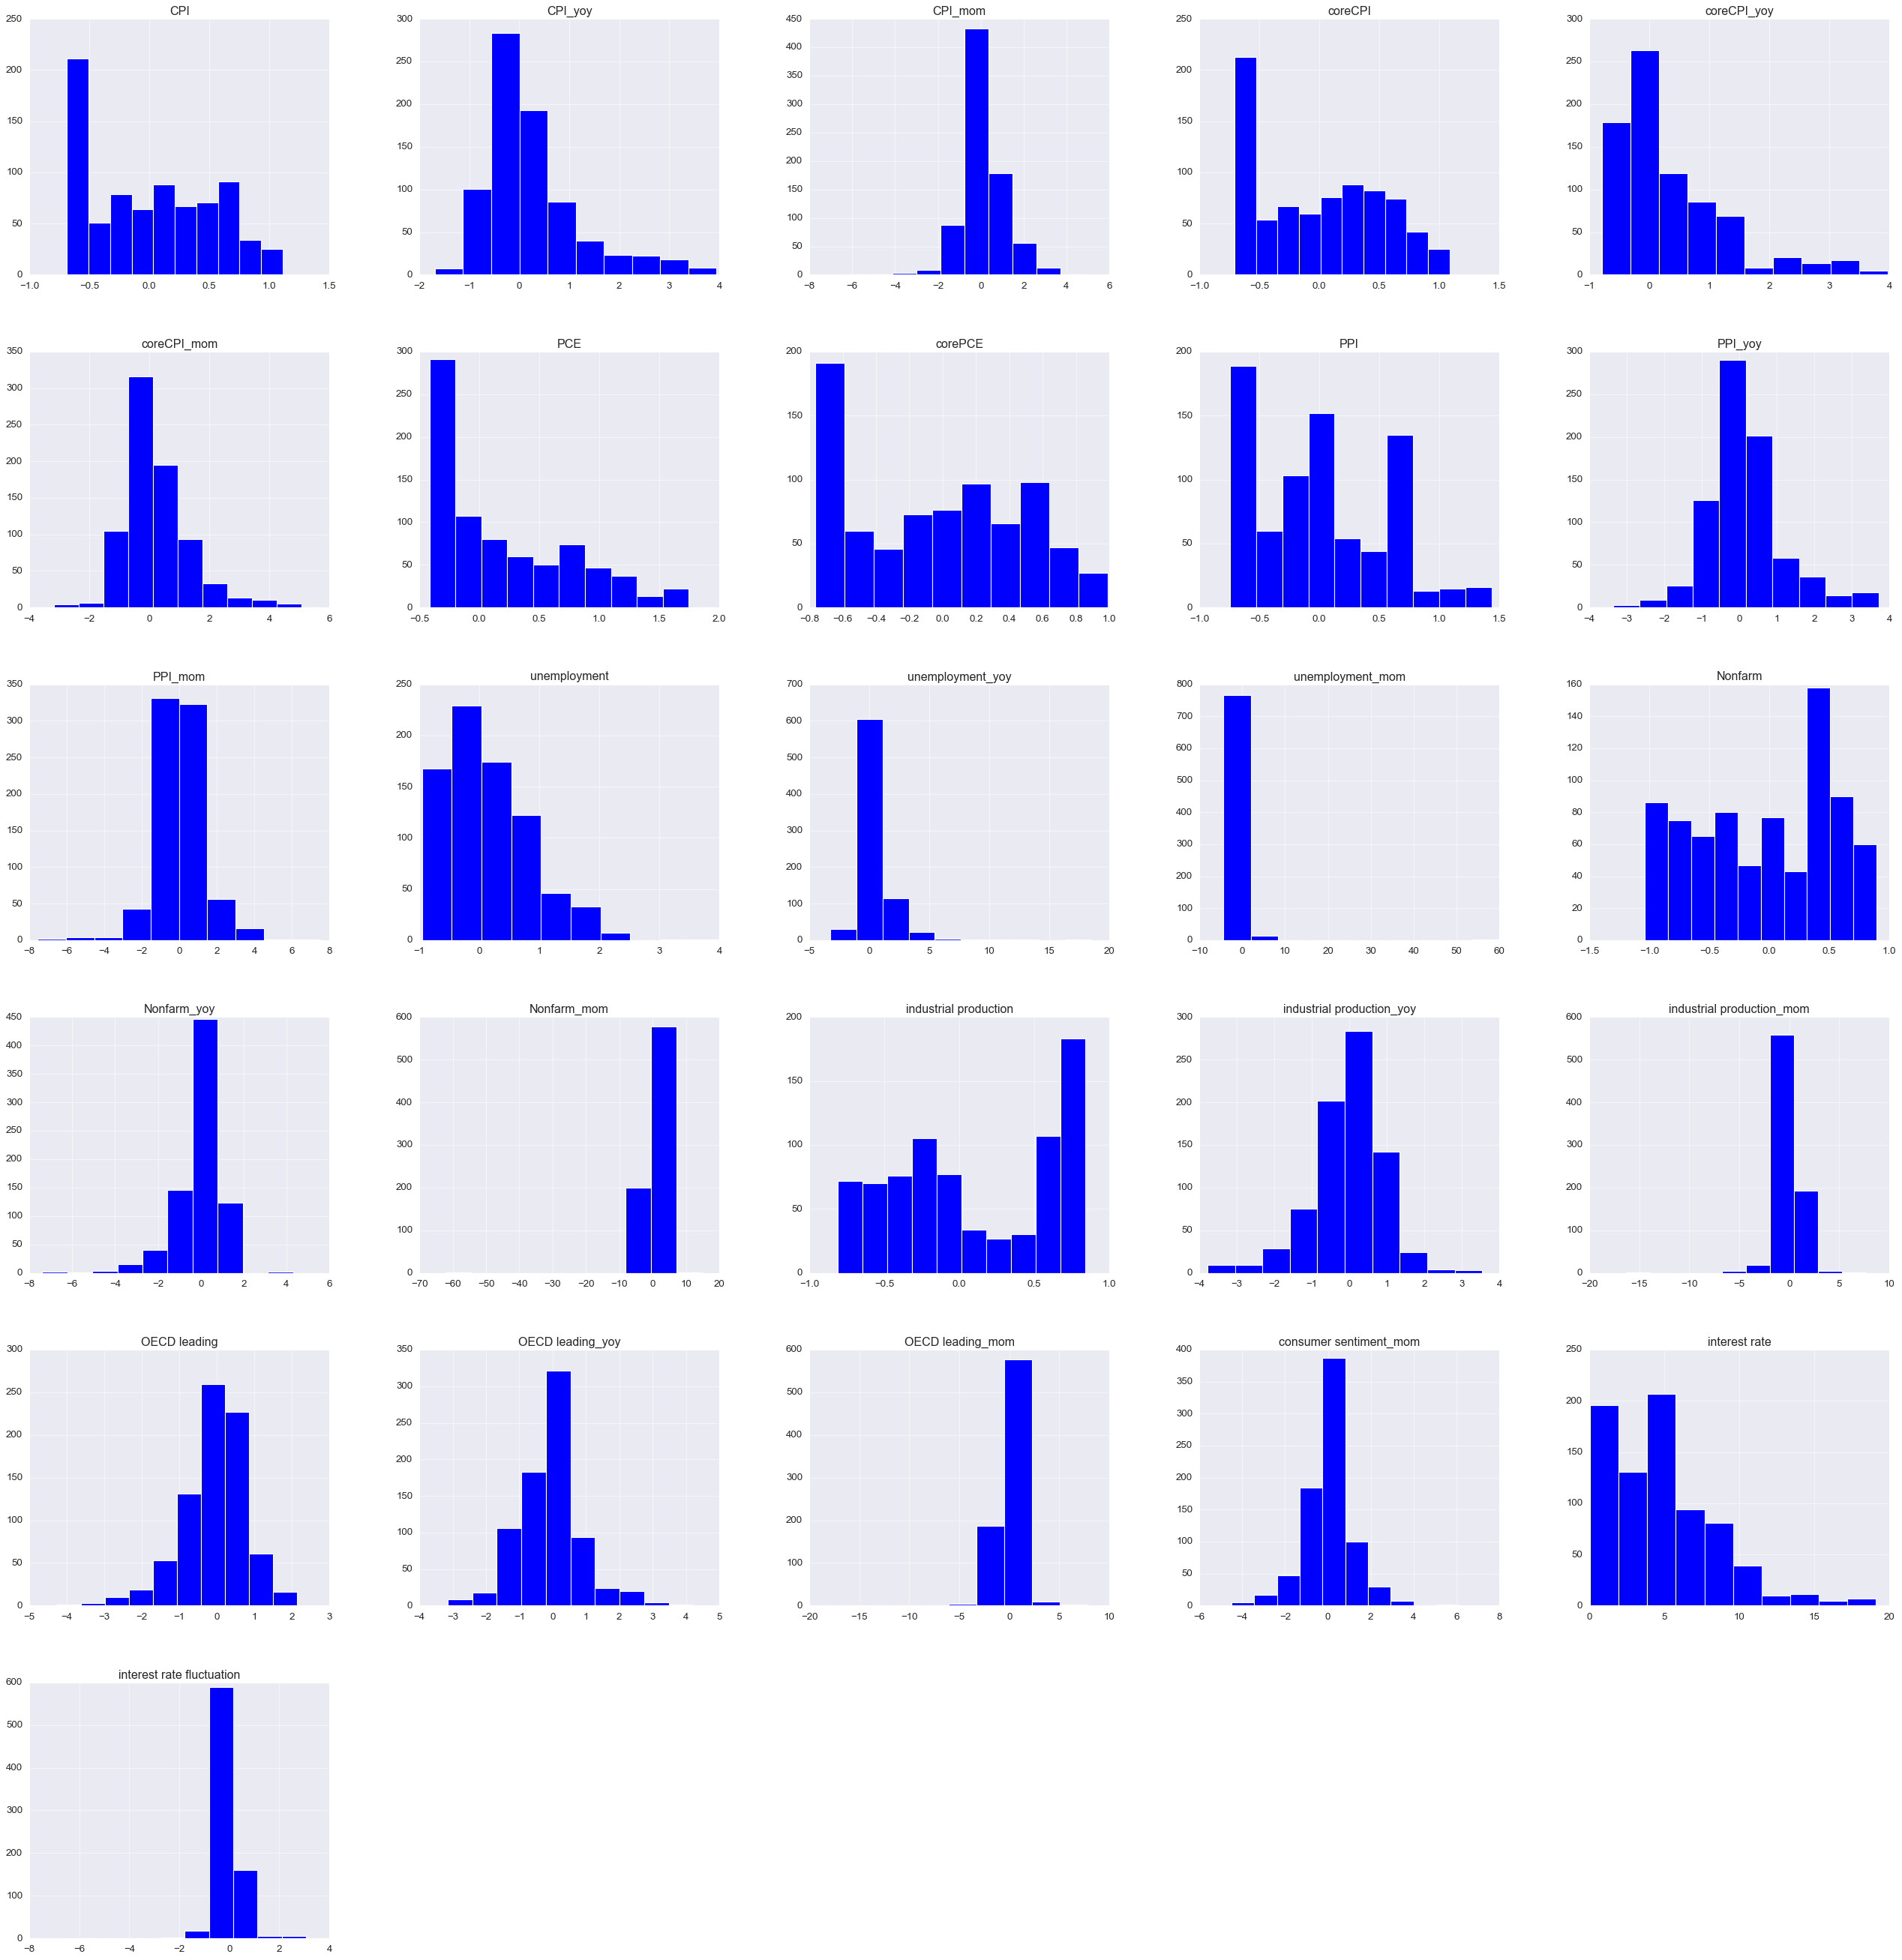

In [121]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
test_df = pd.read_csv('dataframes/imputed_df_q2.csv')
test_df.loc[:,(test_df.columns!='date') & (test_df.columns!='interest rate') &(test_df.columns!='interest rate fluctuation')] = scaler.fit_transform(test_df.loc[:,(test_df.columns!='date') & (test_df.columns!='interest rate') &(test_df.columns!='interest rate fluctuation')])
test_df.hist(figsize=(40,40))



In [122]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

imputed_df_dic = {}
imputed_df_dic['q1'] = pd.read_csv('dataframes/imputed_df_q1.csv')
imputed_df_dic['q2'] = pd.read_csv('dataframes/imputed_df_q2.csv')
imputed_df_dic['q3'] = pd.read_csv('dataframes/imputed_df_q3.csv')

for q in imputed_df_dic.keys():
    temp_df = imputed_df_dic[q]
    temp_df =temp_df[~temp_df.isin([np.nan, np.inf, -np.inf]).any(axis=1)]
    temp_df.loc[:,(temp_df.columns!='date') & (temp_df.columns!='interest rate') &(temp_df.columns!='interest rate fluctuation')] = scaler.fit_transform(temp_df.loc[:,(temp_df.columns!='date') & (temp_df.columns!='interest rate') &(temp_df.columns!='interest rate fluctuation')])
    temp_df.to_csv(f'dataframes/scaled_df_{q}.csv', index=False)



#### 로그 변환 예시

c:\Users\Skku\anaconda3\envs\economy\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


array([[<Axes: title={'center': 'CPI'}>,
        <Axes: title={'center': 'CPI_yoy'}>,
        <Axes: title={'center': 'CPI_mom'}>,
        <Axes: title={'center': 'coreCPI'}>,
        <Axes: title={'center': 'coreCPI_yoy'}>],
       [<Axes: title={'center': 'coreCPI_mom'}>,
        <Axes: title={'center': 'PCE'}>,
        <Axes: title={'center': 'corePCE'}>,
        <Axes: title={'center': 'PPI'}>,
        <Axes: title={'center': 'PPI_yoy'}>],
       [<Axes: title={'center': 'PPI_mom'}>,
        <Axes: title={'center': 'unemployment'}>,
        <Axes: title={'center': 'unemployment_yoy'}>,
        <Axes: title={'center': 'unemployment_mom'}>,
        <Axes: title={'center': 'Nonfarm'}>],
       [<Axes: title={'center': 'Nonfarm_yoy'}>,
        <Axes: title={'center': 'Nonfarm_mom'}>,
        <Axes: title={'center': 'industrial production'}>,
        <Axes: title={'center': 'industrial production_yoy'}>,
        <Axes: title={'center': 'industrial production_mom'}>],
       [<Axes: titl

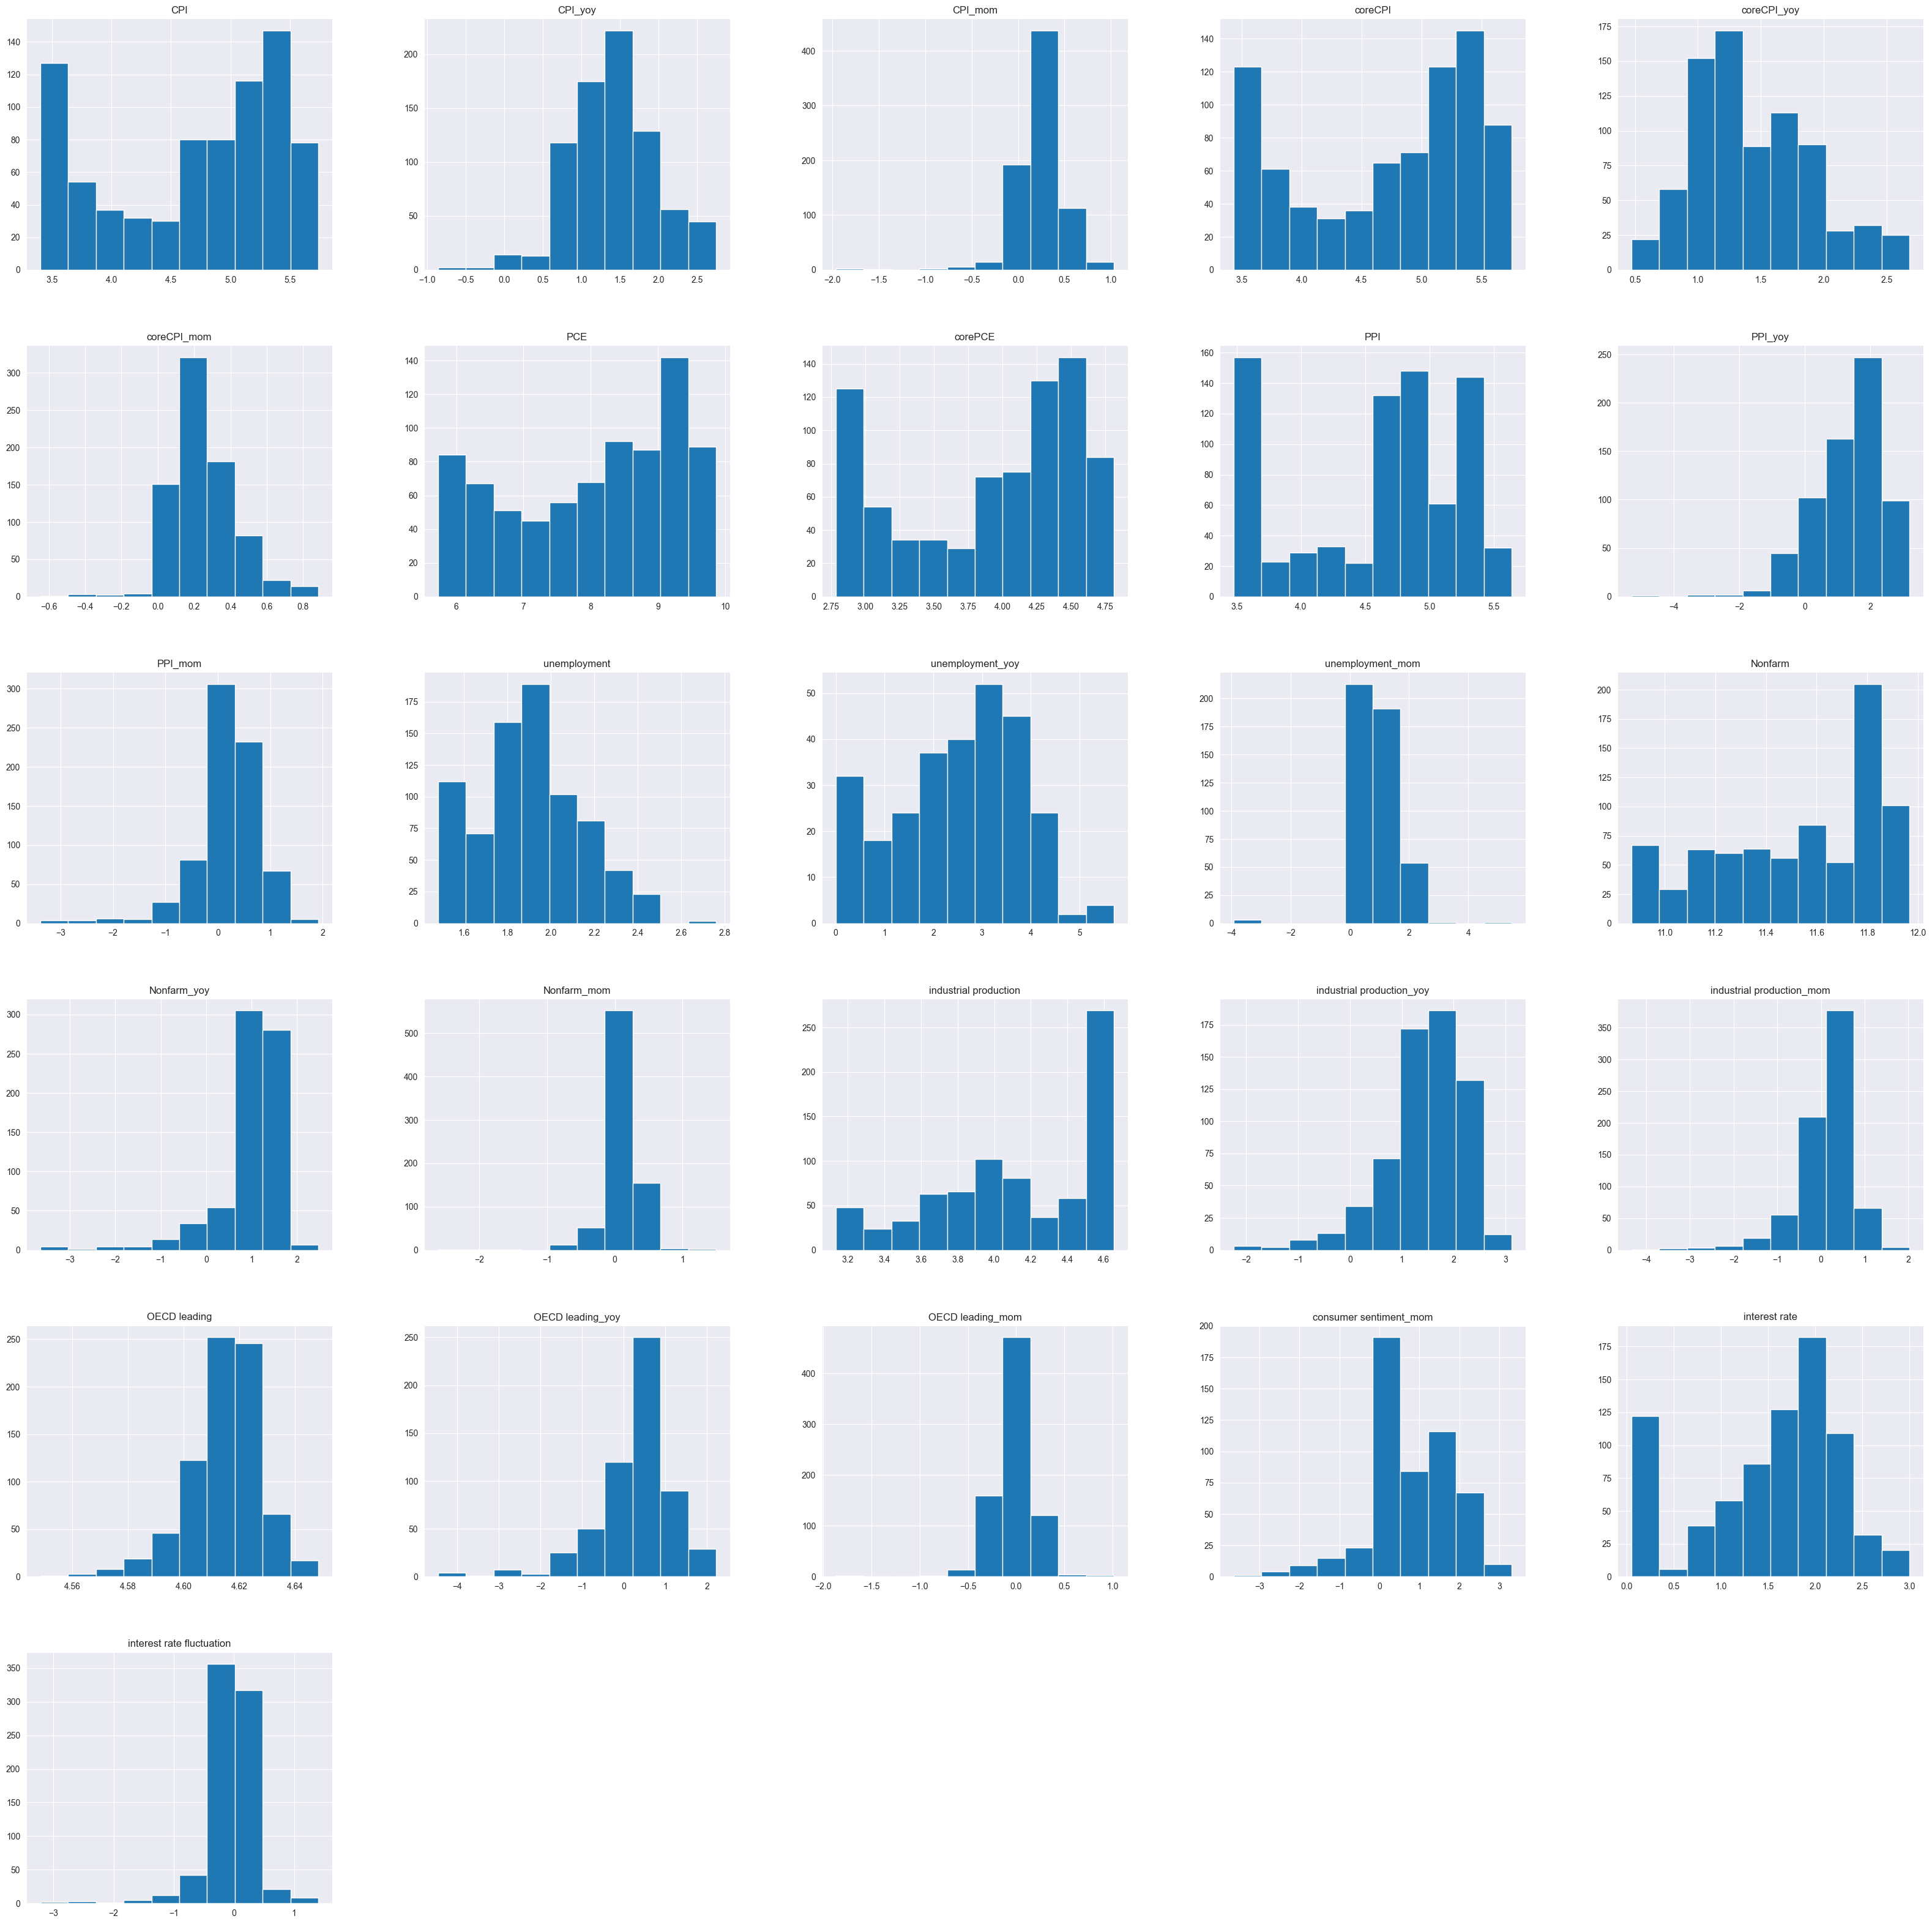

In [31]:
# 0에 로그를 취할 수 없음 => log() 대신 log1p()를 사용
# x+1 에 log를 취함
# 음수에도 로그를 취할 수 없음
log_df = np.log1p(test_df)
log_df.hist(figsize=(40,40))

In [40]:
# 이제 모든 df에 로그 변환을 적용해서 csv로 저장
imputed_df_dic = {}
imputed_df_dic['q1'] = pd.read_csv('dataframes/imputed_df_q1.csv')
imputed_df_dic['q2'] = pd.read_csv('dataframes/imputed_df_q2.csv')
imputed_df_dic['q3'] = pd.read_csv('dataframes/imputed_df_q3.csv')
imputed_df_dic['q4'] = pd.read_csv('dataframes/imputed_df_q4.csv')


# date 제외하고 변환
for q in imputed_df_dic.keys() :
    temp_df = imputed_df_dic[q]
    temp_df.loc[:,temp_df.columns != 'date'] = np.log1p(temp_df.loc[:,temp_df.columns != 'date'])
    print(temp_df.isna().sum())
    

date                           0
CPI                            0
CPI_yoy                        5
CPI_mom                        1
coreCPI                        0
coreCPI_yoy                    0
coreCPI_mom                    0
PCE                            0
PCE_yoy                       15
PCE_mom                        4
corePCE                        0
corePCE_yoy                    4
corePCE_mom                    1
PPI                            0
PPI_yoy                       76
PPI_mom                       37
unemployment                   0
unemployment_yoy             184
unemployment_mom             122
Nonfarm                        0
Nonfarm_yoy                   41
Nonfarm_mom                    1
job openings                   0
job openings_mom             111
retail                        25
retail_yoy                   193
retail_mom                   199
industrial production          0
industrial production_yoy     75
industrial production_mom     13
OECD leadi

c:\Users\Skku\anaconda3\envs\economy\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log1p
  result = func(self.values, **kwargs)
c:\Users\Skku\anaconda3\envs\economy\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


#### 정규화 예시 - MinMax

In [9]:


from sklearn.preprocessing import MinMaxScaler

C:\Users\Skku\AppData\Local\Temp\ipykernel_7696\1257272803.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_df['interest rate'])


<Axes: xlabel='interest rate', ylabel='Density'>

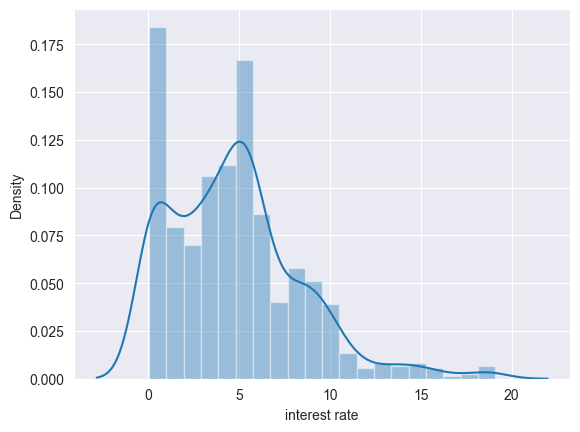

In [25]:
sns.distplot(test_df['interest rate'])

In [13]:
# 회귀 문제에 적합한 정규화를 하겠다.
test_df = pd.read_csv('dataframes/imputed_df_q2.csv')
test_df.drop('date',axis=1,inplace=True)
X = test_df.values

scaler = MinMaxScaler()

scaled = scaler.fit_transform(X)
scaled = pd.DataFrame(scaled,
                      columns=test_df.columns)
scaled.tail()

,CPI,CPI_yoy,CPI_mom,coreCPI,coreCPI_yoy,coreCPI_mom,PCE,corePCE,PPI,PPI_yoy,...,Nonfarm_mom,industrial production,industrial production_yoy,industrial production_mom,OECD leading,OECD leading_yoy,OECD leading_mom,consumer sentiment_mom,interest rate,interest rate fluctuation
776,0.991461,0.341539,0.594925,0.986666,0.272346,0.419567,0.985076,0.993193,0.914373,0.321838,...,0.805645,0.990313,0.436986,0.678299,0.604264,0.434538,0.729058,0.373558,0.277165,0.684211
777,0.992327,0.314455,0.516583,0.989288,0.262963,0.377936,0.987423,0.993511,0.899342,0.312287,...,0.802596,0.981426,0.421024,0.632238,0.609502,0.447431,0.727464,0.295090,0.277165,0.684211
778,0.994083,0.308032,0.539270,0.992658,0.262455,0.413717,0.991712,0.993455,0.889958,0.307449,...,0.803226,0.985184,0.437100,0.683057,0.616981,0.459884,0.731027,0.338343,0.277165,0.684211
779,0.996641,0.319129,0.559599,0.995681,0.254381,0.396498,0.999021,0.995203,0.877948,0.327712,...,0.807255,0.982069,0.462886,0.655334,0.627990,0.471917,0.736635,0.723050,0.277165,0.684211
780,1.000000,0.306008,0.579802,1.000000,0.251655,0.458248,1.000000,1.000000,0.883732,0.319759,...,0.805966,0.968094,0.410900,0.611466,0.641713,0.482938,0.740929,0.715186,0.277165,0.684211


### 상관관계 분석 ( Correlation Analysis )
- 각 컬럼 간의 상관관계를 시각화하여 분석한다.
- 정답인 Interest rate와의 상관관계가 가장 중요하다.
- 이외에 컬럼 간의 상관관계에 따라 다중공선성 처리를 고려한다.

In [128]:
# 결측치 처리 데이터 로드
scaled_df_dic={}
scaled_df_dic['q1'] = pd.read_csv('dataframes/scaled_df_q1.csv')
scaled_df_dic['q2'] = pd.read_csv('dataframes/scaled_df_q2.csv')
scaled_df_dic['q3'] = pd.read_csv('dataframes/scaled_df_q3.csv')

for z in scaled_df_dic.items():
    print(f'{z[0]} : {len(z[1].keys())} 개의 열 , {z[1].date.count()} 개의 행')
    

q1 : 40 개의 열 , 117 개의 행
q2 : 27 개의 열 , 781 개의 행
q3 : 17 개의 열 , 841 개의 행


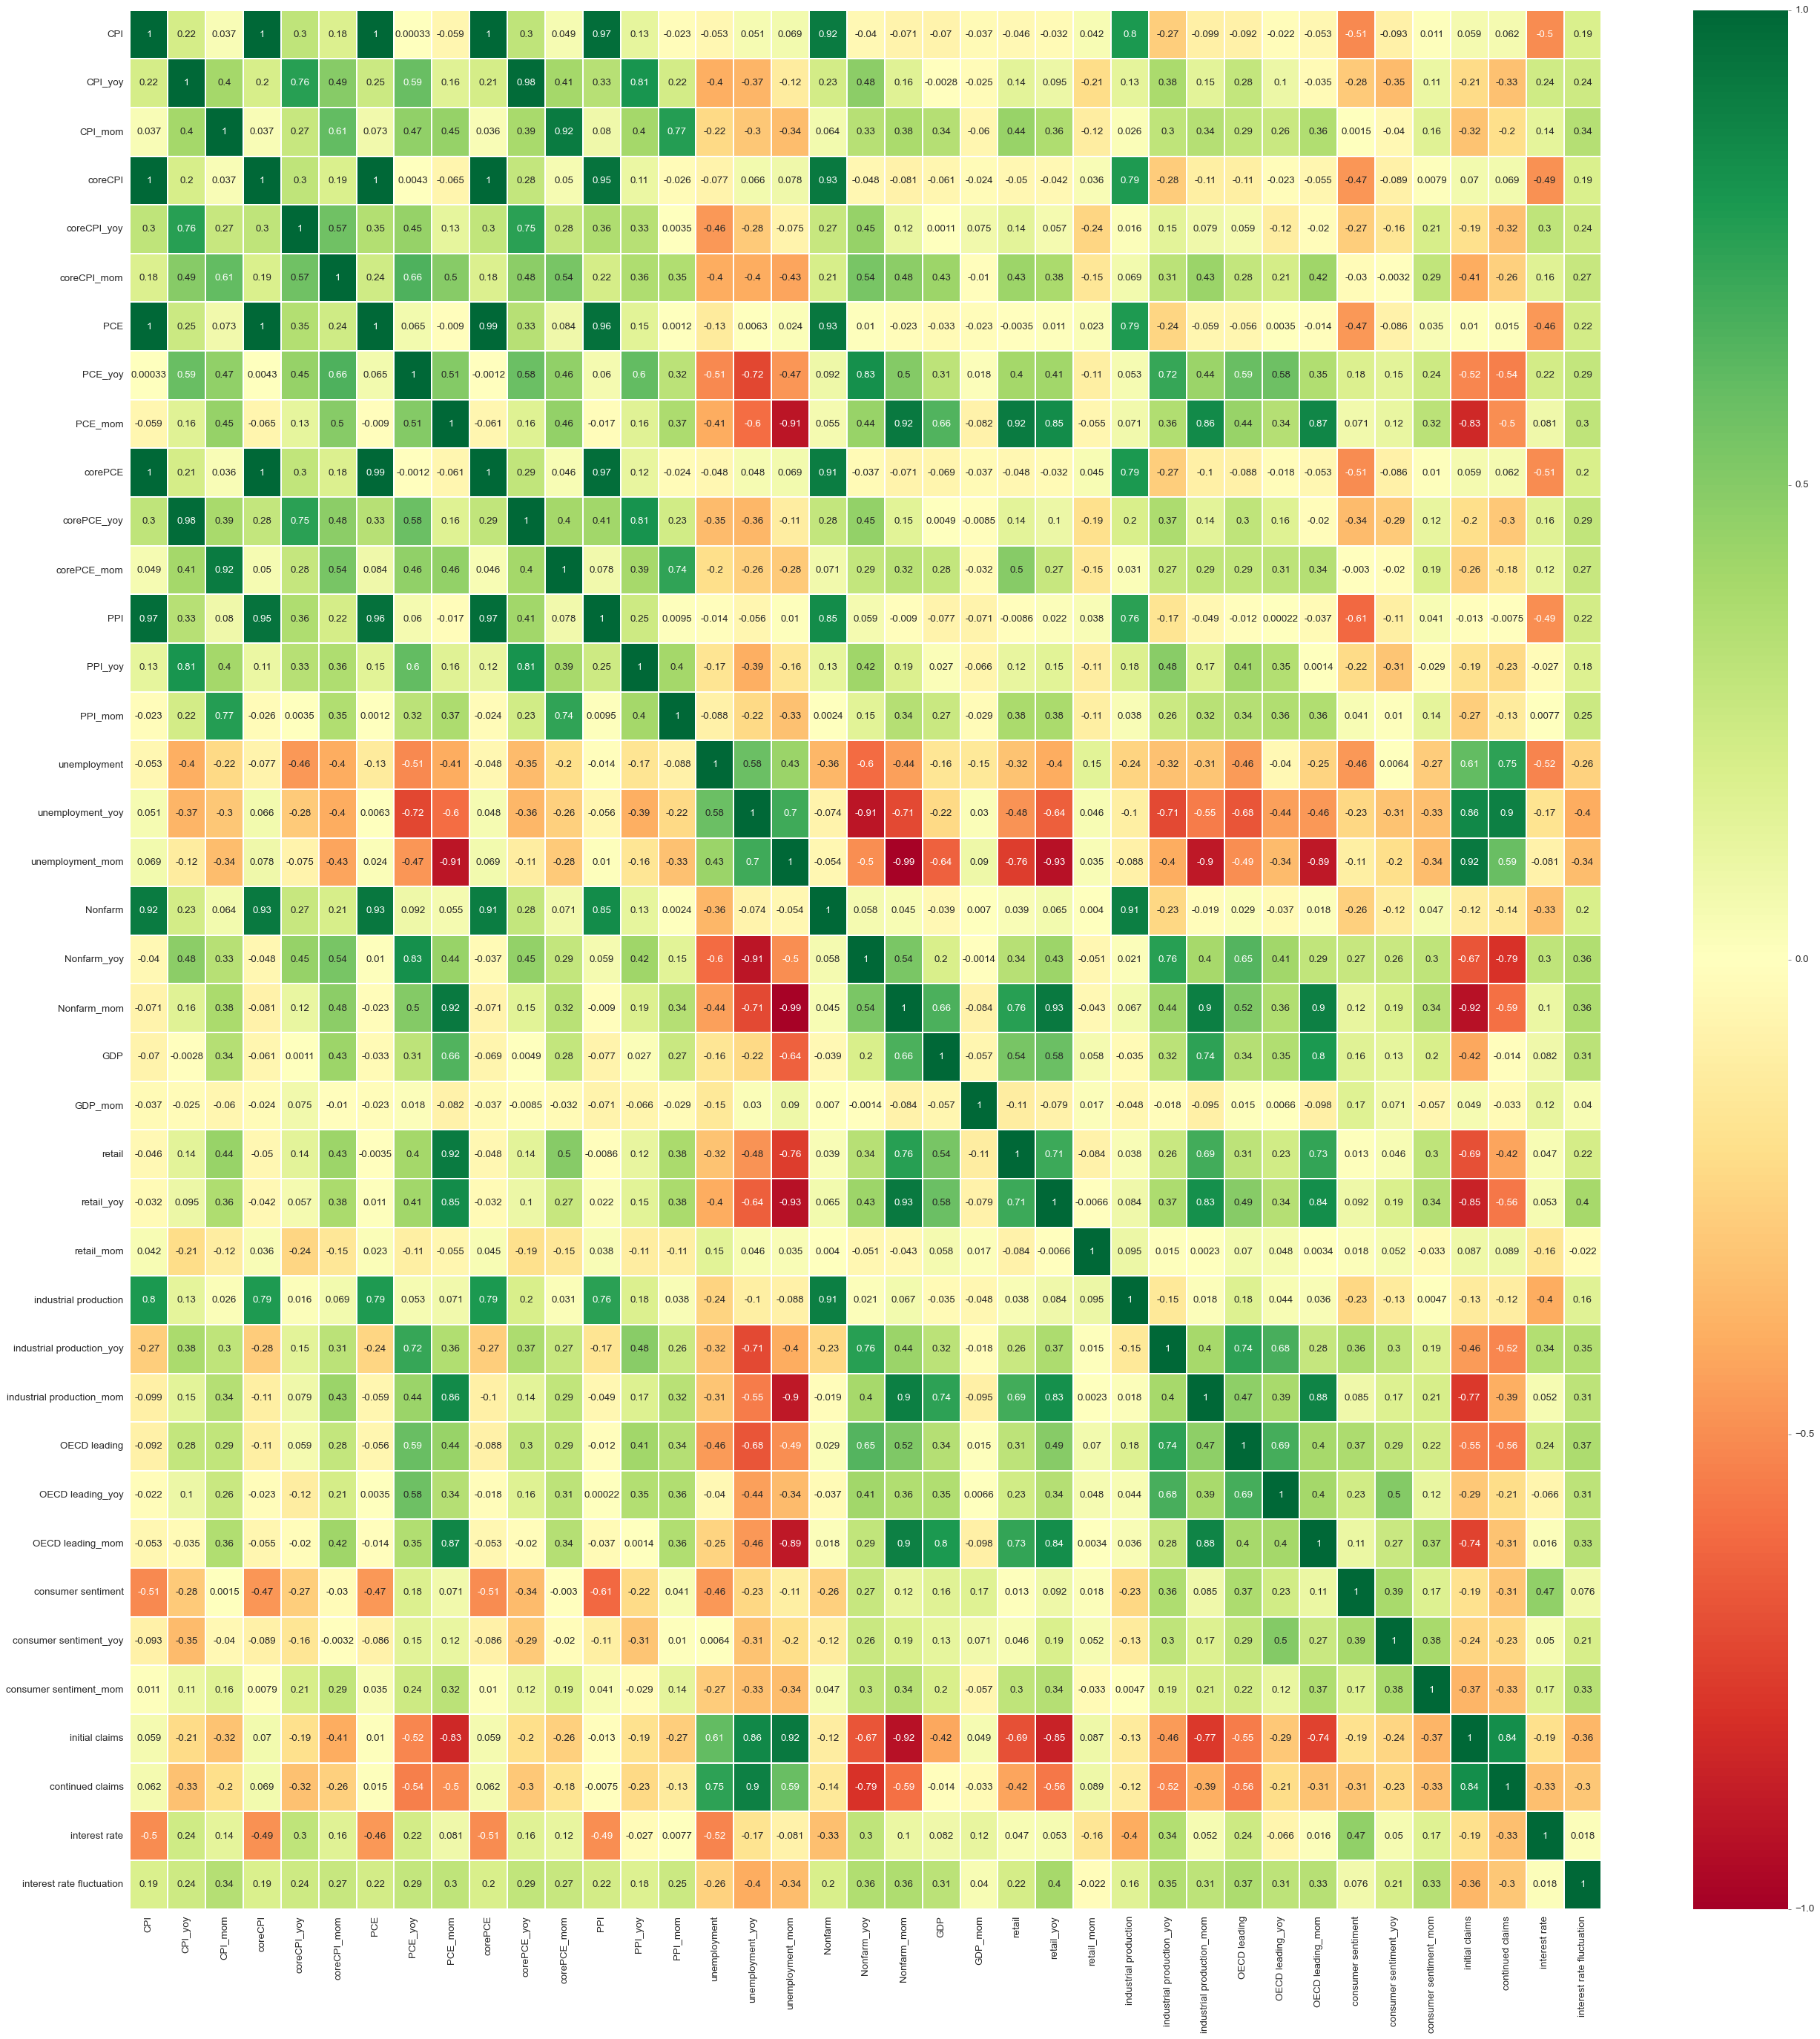

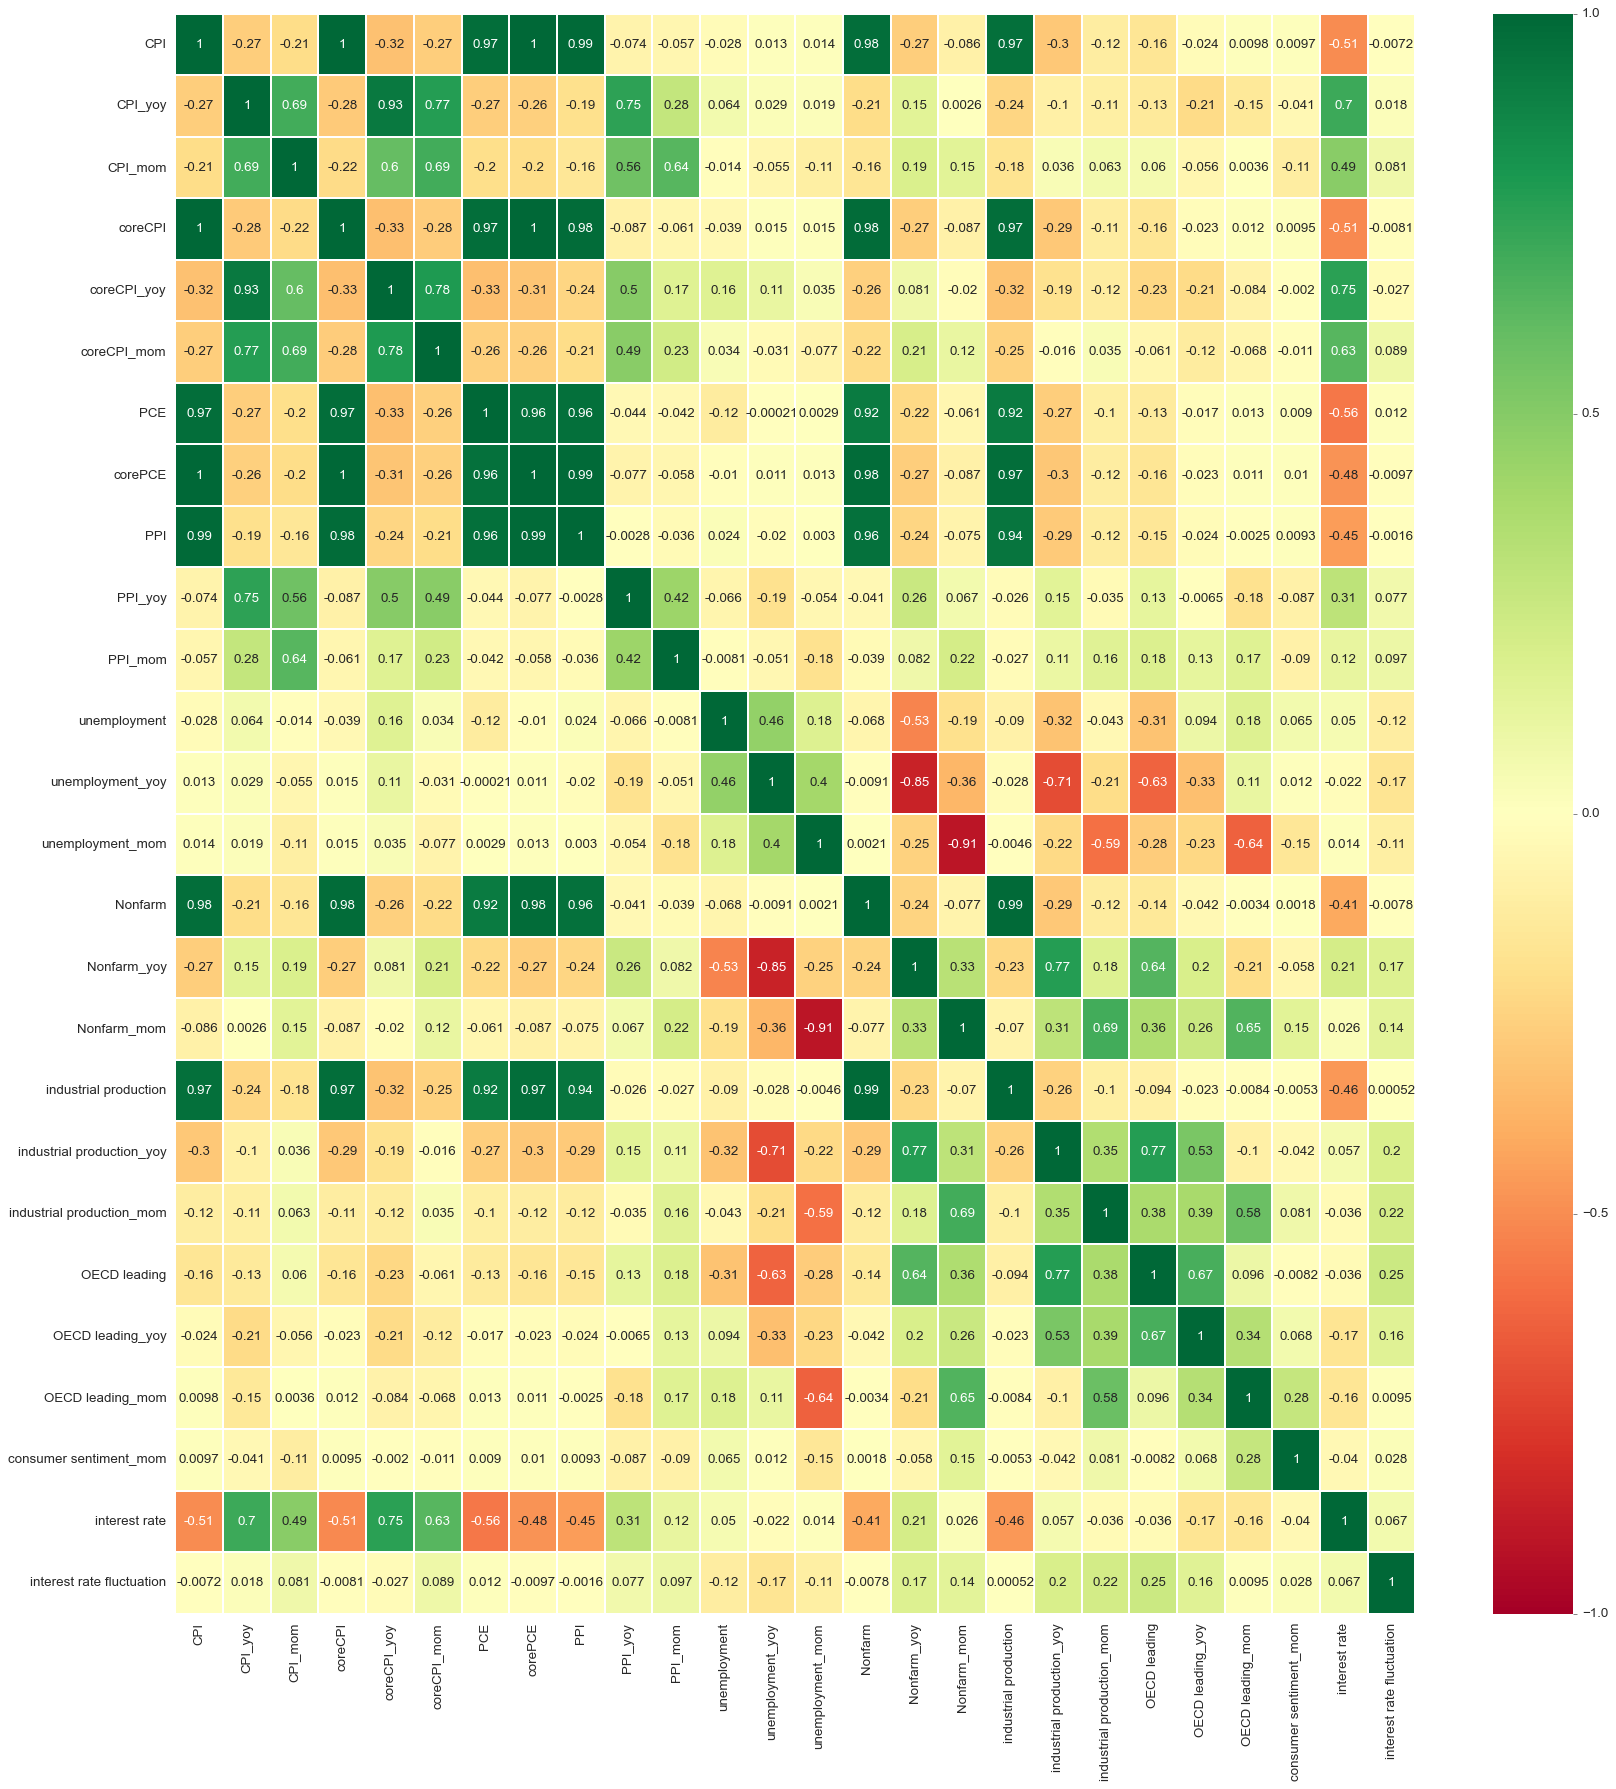

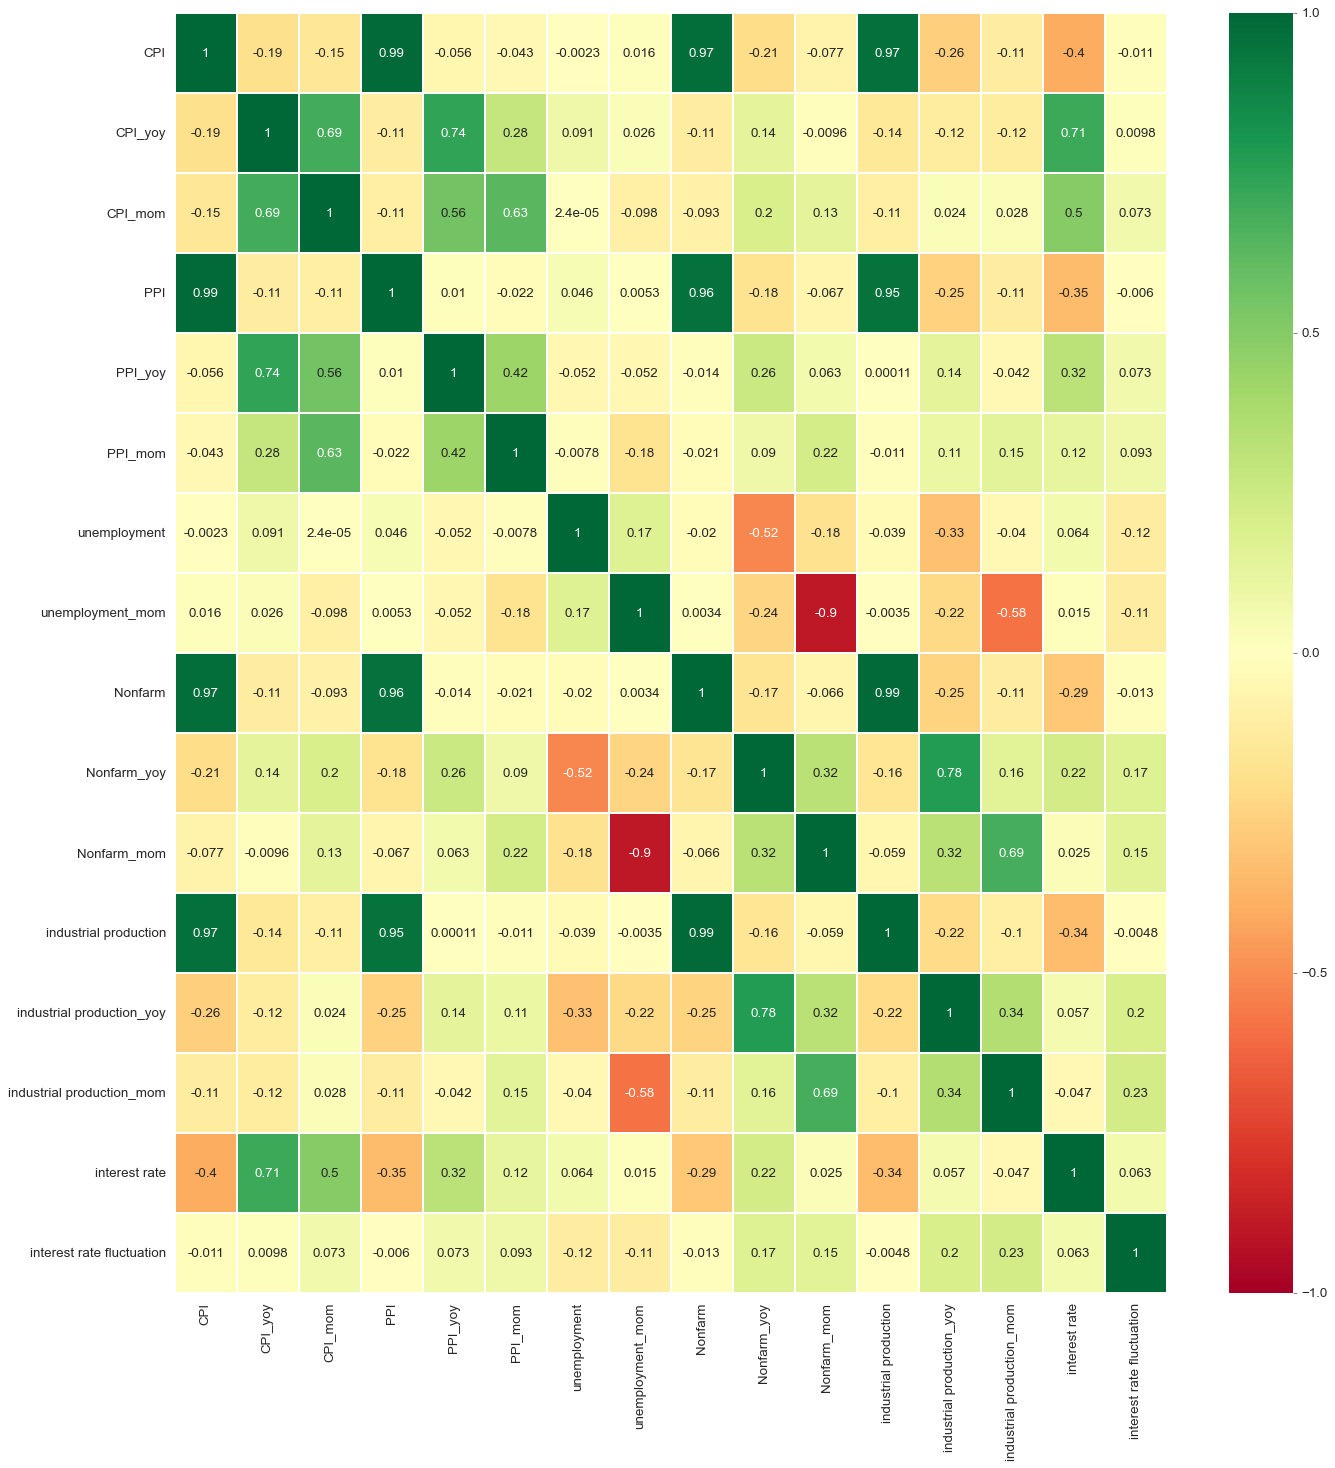

In [129]:
size_dic = {'q1':40, 'q2':25, 'q3':20}

for t in size_dic.items():
    corr_df = imputed_df_dic[t[0]].drop('date',axis=1)
    fig, ax = plt.subplots(figsize=(t[1],t[1])) 
    sns.heatmap(corr_df.corr(),vmin=-1,vmax=1,annot=True,linewidths=0.2,cmap='RdYlGn', ax=ax)
    plt.savefig(f'images/correlation_{t[0]}.png')

#### 금리 변동을 어느 행에 포함할지 고려함
- 예 : 2000년 3월 금리 - 2000년 4월 금리의 차이
- 금리 차를 3월에 넣을 때보다 4월에 넣을 때 상관계수가 올라감 
- 두 금리의 차를 다음 행에 포함하기로 결정

In [162]:
sdf = shifted_df.copy()
for key in sdf.keys():
    if sdf.count()[key] < 841:
        sdf.drop(key, axis=1, inplace=True)
sdf.dropna(axis=0, inplace=True)

try : 
    sdf.drop('date',axis=1,inplace=True)
except :
    pass 
abs(sdf.corr()['interest rate fluctuation'])

CPI                          0.012605
CPI_yoy                      0.005871
CPI_mom                      0.030761
PPI                          0.008565
PPI_yoy                      0.056850
PPI_mom                      0.108234
unemployment                 0.083441
unemployment_yoy             0.115869
unemployment_mom             0.091161
Nonfarm                      0.016046
Nonfarm_yoy                  0.129467
Nonfarm_mom                  0.103490
industrial production        0.009847
industrial production_yoy    0.151681
industrial production_mom    0.195280
consumer sentiment_mom       0.107679
interest rate                0.072698
interest rate fluctuation    1.000000
Name: interest rate fluctuation, dtype: float64

In [167]:
abs(corr_df.corr()['interest rate fluctuation']).sum(), abs(sdf.corr()['interest rate fluctuation']).sum()

(2.5178161136973474, 2.2995447133770175)

### Feature Selection : 상관 관계가 낮은 컬럼 제거 
- 상관계수가 0.3 미만인 변수는 제거

In [130]:
# 상관계수가 0.3 미만인 컬럼명을 저장하고 해당 컬럼을 제거한다.


cols = []
MINCORR = 0.3

weak_corr_dic = {}
for q, df in scaled_df_dic.items():
    cols = []
    for col, val in abs(df.loc[:, df.columns != 'date'].corr()['interest rate']).items() :
        if val < MINCORR :
            cols.append(col)
            df.drop(col, axis=1, inplace=True)
    
    weak_corr_dic[q] = cols
    df.to_csv(f'dataframes/selected_df_{q}.csv', index=False)

weak_corr_dic

{'q1': ['CPI_yoy',
  'CPI_mom',
  'coreCPI_yoy',
  'coreCPI_mom',
  'PCE_yoy',
  'PCE_mom',
  'corePCE_yoy',
  'corePCE_mom',
  'PPI_yoy',
  'PPI_mom',
  'unemployment_yoy',
  'unemployment_mom',
  'Nonfarm_yoy',
  'Nonfarm_mom',
  'GDP',
  'GDP_mom',
  'retail',
  'retail_yoy',
  'retail_mom',
  'industrial production_mom',
  'OECD leading',
  'OECD leading_yoy',
  'OECD leading_mom',
  'consumer sentiment_yoy',
  'consumer sentiment_mom',
  'initial claims',
  'interest rate fluctuation'],
 'q2': ['PPI_mom',
  'unemployment',
  'unemployment_yoy',
  'unemployment_mom',
  'Nonfarm_yoy',
  'Nonfarm_mom',
  'industrial production_yoy',
  'industrial production_mom',
  'OECD leading',
  'OECD leading_yoy',
  'OECD leading_mom',
  'consumer sentiment_mom',
  'interest rate fluctuation'],
 'q3': ['PPI_mom',
  'unemployment',
  'unemployment_mom',
  'Nonfarm',
  'Nonfarm_yoy',
  'Nonfarm_mom',
  'industrial production_yoy',
  'industrial production_mom',
  'interest rate fluctuation']}

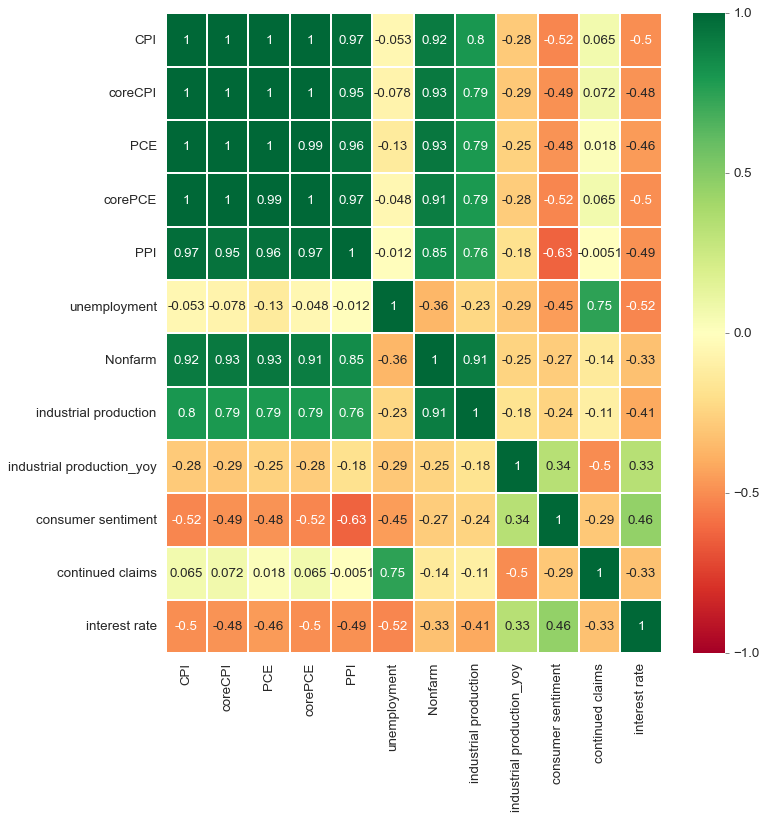

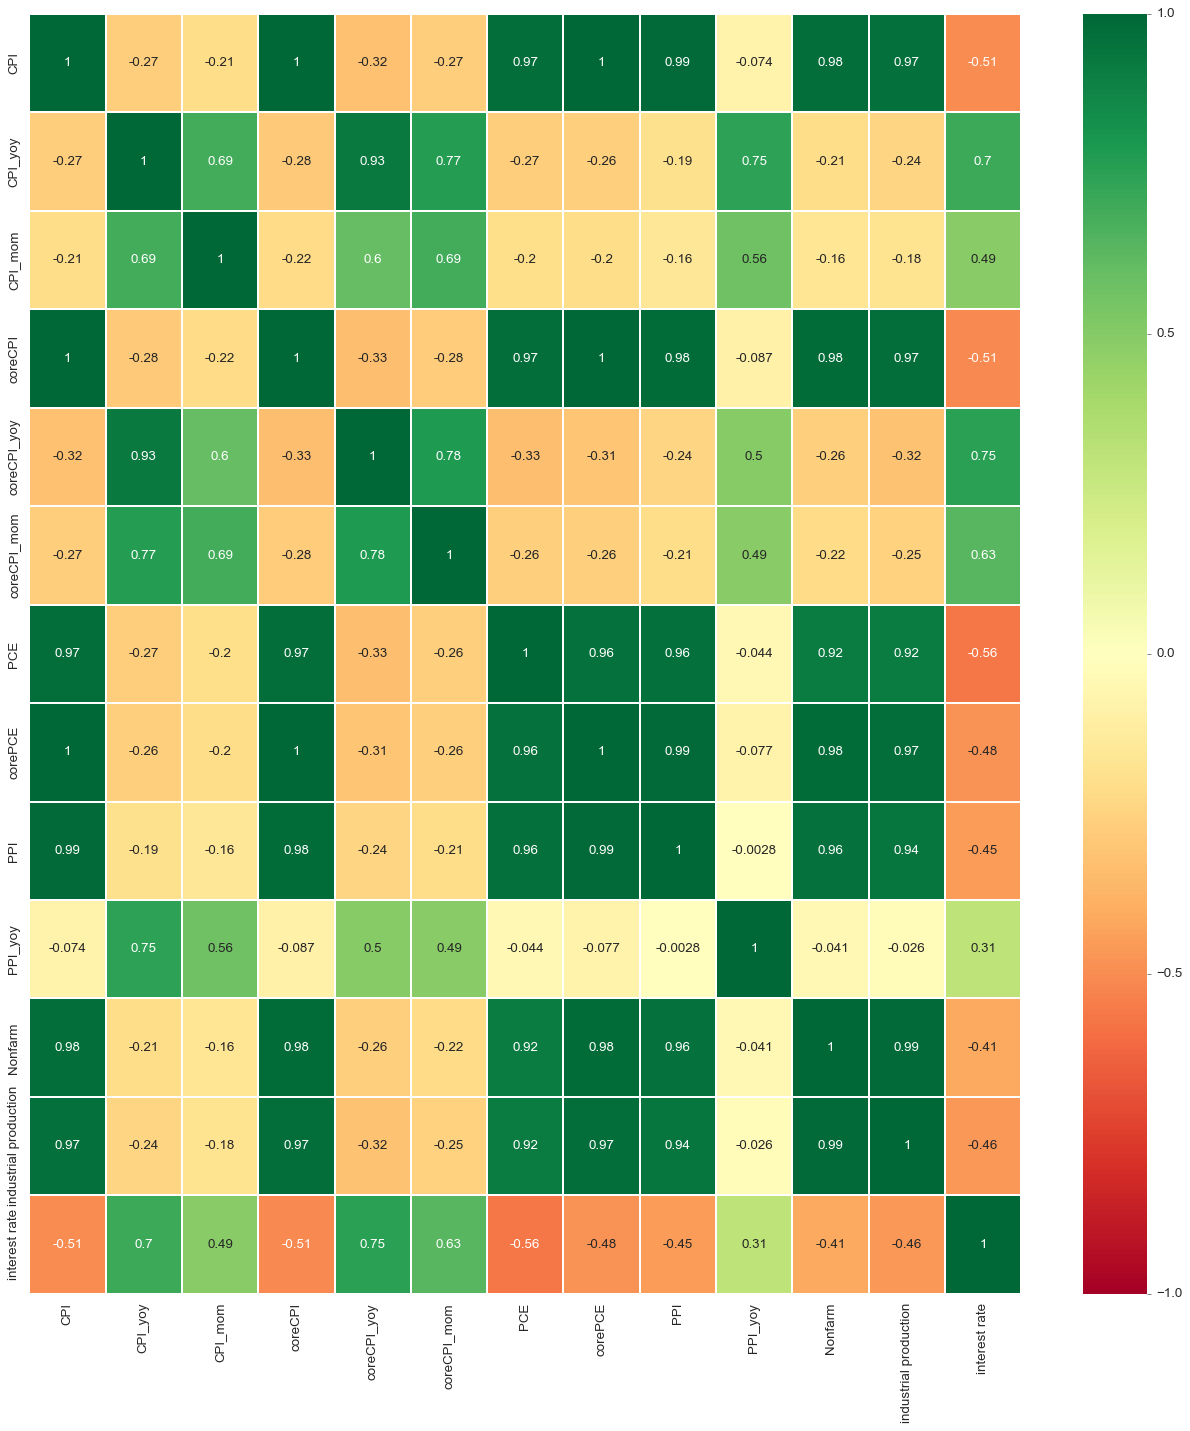

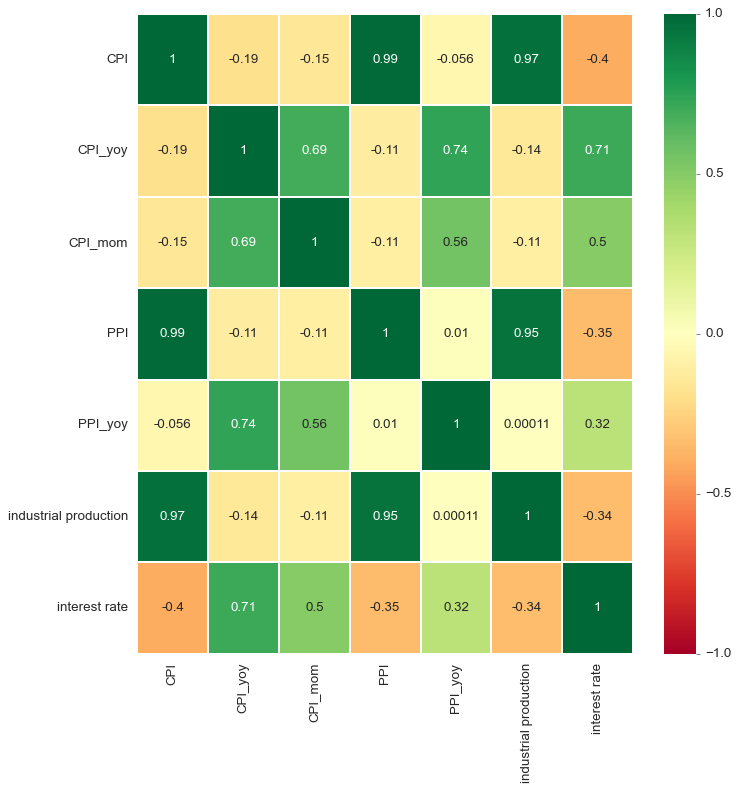

In [132]:
size_dic = {'q1':10, 'q2':20, 'q3':10}
selected_df_dic={}
selected_df_dic['q1'] = pd.read_csv('dataframes/selected_df_q1.csv')
selected_df_dic['q2'] = pd.read_csv('dataframes/selected_df_q2.csv')
selected_df_dic['q3'] = pd.read_csv('dataframes/selected_df_q3.csv')

for q, size in size_dic.items():
    temp_df = selected_df_dic[q].loc[:, selected_df_dic[q].columns != 'date']
    fig, ax = plt.subplots(figsize=(size,size)) 
    sns.heatmap(temp_df.corr(),vmin=-1,vmax=1,annot=True,linewidths=0.2,cmap='RdYlGn', ax=ax)
    plt.savefig(f'images/selected_correlation_{q}.png')